# Feynman

From: http://gkantonius.github.io/feynman/auto_examples/index.html

In [1]:
from pyfeyn2.feynmandiagram import FeynmanDiagram, Leg, Propagator, Vertex
from pyfeyn2.render.all import AllRender
from pyfeyn2.auto.position import feynman_adjust_points
from pyfeyn2.auto.label import auto_label

tikz:


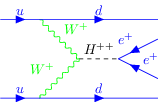

pyx:
pyx failed:
Traceback (most recent call last):
  File "/home/apn/data/de.neuwirthinformatik.Alexander/Development/git/pyfeyn2/pyfeyn2/render/all.py", line 86, in render
    render(fd).render(dirpath + "/" + name + ".pdf", **dynarg)
  File "/home/apn/data/de.neuwirthinformatik.Alexander/Development/git/pyfeyn2/pyfeyn2/render/pyx/pyxrender.py", line 45, in render
    nl = NamedLine[l.type](Point(tar.x, tar.y), Point(l.x, l.y))
KeyError: 'anti fermion'

feynmp:


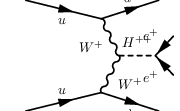

feynman:


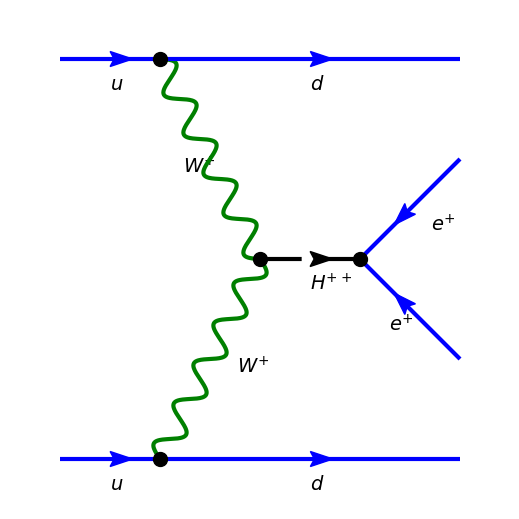

dot:
dot failed:
Traceback (most recent call last):
  File "/home/apn/data/de.neuwirthinformatik.Alexander/Development/git/pyfeyn2/pyfeyn2/render/all.py", line 86, in render
    render(fd).render(dirpath + "/" + name + ".pdf", **dynarg)
  File "/home/apn/data/de.neuwirthinformatik.Alexander/Development/git/pyfeyn2/pyfeyn2/render/latex/dot.py", line 72, in __init__
    self.set_feynman_diagram(fd)
  File "/home/apn/data/de.neuwirthinformatik.Alexander/Development/git/pyfeyn2/pyfeyn2/render/latex/dot.py", line 76, in set_feynman_diagram
    self.src_dot = feynman_to_dot(
  File "/home/apn/data/de.neuwirthinformatik.Alexander/Development/git/pyfeyn2/pyfeyn2/interface/dot.py", line 49, in feynman_to_dot
    thestyle = styler(l)
  File "/home/apn/data/de.neuwirthinformatik.Alexander/Development/git/pyfeyn2/pyfeyn2/render/latex/dot.py", line 33, in stylize_connect
    style = 'style="{}",texmode="raw"'.format(map_feyn_to_tikz[c.type])
KeyError: 'anti fermion'

mpl:
mpl failed:
Traceback (mos

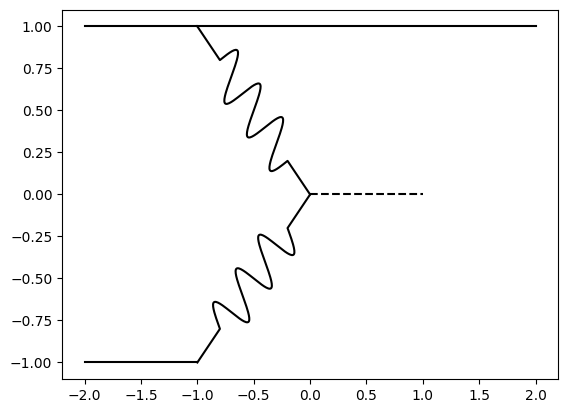

In [2]:
v1 = Vertex(x=-1,y=1)
v2 = Vertex(x=-1,y=-1)

v3 = Vertex(x=0,y=0)
v4 = Vertex(x=1,y=0)

i1 = Leg(x=-2,y=1,target=v1.id,name="u").with_incoming()
i2 = Leg(x=-2,y=-1,target=v2.id,name="u").with_incoming()

o1 = Leg(x=2,y=1,target=v1.id,pdgid=1).with_outgoing()
o2 = Leg(x=2,y=0.5,target=v4.id,pdgid=-11).with_outgoing()
o3 = Leg(x=2,y=-0.5,target=v4.id,pdgid=-11).with_outgoing()
o4 = Leg(x=2,y=-1, target=v2.id,pdgid=1).with_outgoing()

fd = FeynmanDiagram().add(
    v1,v2,v3,v4,
    
    i1,i2,
    
    o1,o2,o3,o4,
    
    Propagator(type="higgs",
               source=v3.id,
               target=v4.id,
               label=r"$H^{++}$"
              ),
    Propagator(pdgid=24,source=v1.id,target=v3.id),
    Propagator(pdgid=24,source=v2.id,target=v3.id)
).add_rules("""
[type=fermion] { color : blue}
[type="anti fermion"] { color : blue}
[type="boson"] { color : green}
""")
auto_label(fd.propagators+fd.legs)
ar = AllRender(fd)
ar.render()